___
# PROJETO 3
### Entrega Final

### Ana Capriles
___

Neste miniprojeto, será feito um estudo da distribuição da média amostral com o objetivo de verificar o Teorema do Limite
Central (TLC).

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

A distribuição teórica escolhida pelo grupo foi a lognormal.

In [2]:
distribuicao_lognorm = stats.lognorm.rvs(0.5, loc=0, scale= 1, size=1000000)
distribuicao_lognorm.mean()
distribuicao_lognorm.var()

0.36513278754238843

A média da distribuição gerada pelo Python é 1.13 e a variância é 0.36.

Inicialmente, vamos gerar grupos aleatórios de 2 elementos, calcular a média amostral de cada grupo, e em seguida, a média 
amostral das médias amostrais de cada grupo e sua variância.

### n = 2

Média amostral:2.030764337276019
Média das médias amostrais:1.1424406431500091
Variância das médias amostrais:0.18436443331757668


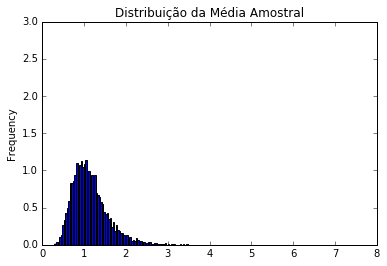

In [3]:
def tlc(n):
    amostras = np.random.choice(distribuicao_lognorm,n)
    media_amostral = amostras.mean()
    print("Média amostral:{}".format(media_amostral))
    media_media_amostral = 0
    medias_amostrais = []
    for i in range(10000):
        amostras = np.random.choice(distribuicao_lognorm,n)
        media_amostral = amostras.mean()
        medias_amostrais.append(media_amostral)
        media_media_amostral += media_amostral
    media_media_amostral = (media_media_amostral/10000)
    print("Média das médias amostrais:{}".format(media_media_amostral))
    
    medias_amostrais = np.array(medias_amostrais)
    var_medias_amostrais = medias_amostrais.var()
    print("Variância das médias amostrais:{}".format(var_medias_amostrais))
    
    datalog2 = pd.Series(medias_amostrais)
    #a = 0
    #if (n == 2) or (n == 4):
    #    a = 120
    #else:
    #    a = n
    hist2 = datalog2.plot(kind="hist", bins = 120, normed=True)
    plt.title("Distribuição da Média Amostral")
    plt.xlim((0,8))
    plt.ylim((0,3))
    
tlc(2)

Interpretação dos resultados: De acordo com o teorema do limite central, a média das médias amostrais é equivalente à média teórica. No entanto, a variância é equivalente à variância teórica dividida pelo número de amostras.

Média amostral:1.3864225709359483
Média das médias amostrais:1.134764592263596
Variância das médias amostrais:0.09481364315099122


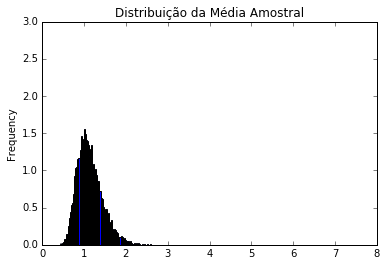

In [4]:
tlc(4)

Média amostral:1.2652848933958878
Média das médias amostrais:1.135925485652161
Variância das médias amostrais:0.017823386307456373


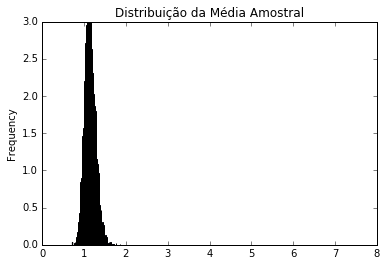

In [5]:
tlc(20)

Média amostral:1.131053282855589
Média das médias amostrais:1.1323381169242785
Variância das médias amostrais:0.007372735737864415


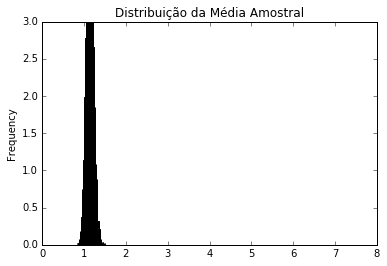

In [6]:
tlc(50)

Conforme n aumenta (conforme selecionamos grupos que contém um maior número de elementos), a média amostral tende à média teórica, 
o que aparece nos gráficos acima. De acordo com o teorema do limite central, a distribuição da média amostral converge para uma 
distribuição normal com média μ e variância σ, o que também fica evidente nos gráficos conforme n é variado. 

### Análise da amostra aleatória

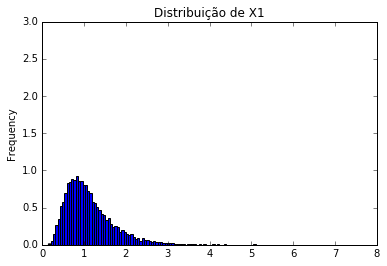

In [24]:
x1x9amostras = np.random.choice(distribuicao_lognorm,n)
lista_x1  = []
lista_x9 = []

for i in range(10000):
    amostras = np.random.choice(distribuicao_lognorm,n)
    lista_x1.append(amostras[0])
    lista_x9.append(amostras[8])

lista_x1 = np.array(lista_x1)
lista_x9 = np.array(lista_x9)
datalog1 = pd.Series(lista_x1)
hist1 = datalog1.plot(kind="hist", bins=120, normed=True)
plt.xlim((0,8))
plt.ylim((0,3))
plt.title("Distribuição de X1")

#shape,loc1,scale1 = stats.lognorm.fit(lista_x1)
#print(shape,loc1, scale1)
#x = np.linspace(0, 17, 1000)
#plt.plot(x, lognorm, 'r-', lw=5, color='red')

In [22]:
shape,loc1,scale1 = stats.lognorm.fit(lista_x1)
print(shape,loc1, scale1)
x = np.linspace(0, 17, 1000)
plt.plot(x, lognorm, 'r-', lw=5, color='red')

0.49732269098 0.000667606968224 1.00388270674


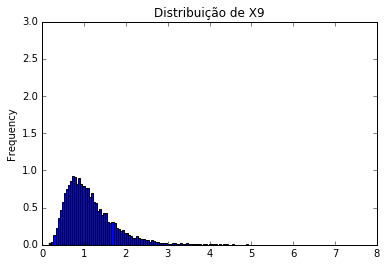

In [16]:
datalog9 = pd.Series(lista_x9)
hist9 = datalog9.plot(kind="hist", bins=120, normed=True)
plt.xlim((0,8))
plt.ylim((0,3))
plt.title("Distribuição de X9")

Observa-se pelo formato dos gráficos que também correspondem a distribuições lognormais, da mesma forma que distribuição inicial 
escolhida (item 1).

In [12]:
#item v
corr = stats.pearsonr(lista_x1, lista_x9)
# o primeiro valor retornado é o coeficiente de correlação

print("Correlação entre x1 e x9:{}".format(corr[0]))

Correlação entre x1 e x9:-0.00013158899801711624


A correlação entre X1 e X9 é igual a -0.0001, o que indica ausência de correlação linear entre ambas. Assim X1 e X9 são 
independentes.

### Conclusão

De acordo com o teorema do limite central, para uma amostra aleatória retirada de uma população cuja variável de interesse X
tem média μ e variância σ, então a distribuição da média amostral (X̅) converge para uma distribuição normal com média μ e 
variância σ. Dividimos a amostra em grupos de n elementos, e quando n tende ao infinito, a distribuição tende à normal. Até o caso
n = 50, o gráfico ainda não é uma normal "perfeita".
O que é mais importante ainda é perceber que conforme n aumenta (conforme selecionamos grupos que contém um maior número de 
elementos), a média amostral tende à média teórica. No caso limite, n é o tamanho do dataset inteiro, e nesse caso tem-se a média
simples. Por isso, a distribuição normal tende a "afinar", a ficar mais fina, e a se aproximar ao valor central conforme n aumenta.